In [69]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['Classified Data']


In [70]:
#read the file
df = pd.read_csv("../input/Classified Data")

In [71]:
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [72]:
df = df.drop("Unnamed: 0", axis=  1)


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
WTT             1000 non-null float64
PTI             1000 non-null float64
EQW             1000 non-null float64
SBI             1000 non-null float64
LQE             1000 non-null float64
QWG             1000 non-null float64
FDJ             1000 non-null float64
PJF             1000 non-null float64
HQE             1000 non-null float64
NXJ             1000 non-null float64
TARGET CLASS    1000 non-null int64
dtypes: float64(10), int64(1)
memory usage: 86.0 KB


In [74]:
df.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


Firstly applying knn for model fitting 

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
#drop trget class from frature
X = df.drop('TARGET CLASS',axis=1)
y = df['TARGET CLASS']

In [77]:
#train the model
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [78]:
#import knn library
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
#fit the model
knn.fit(X_train, y_train)
#predict the model
y_pred = knn.predict(X_test)

In [79]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.92      0.94      0.93       142
           1       0.95      0.92      0.94       158

   micro avg       0.93      0.93      0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300

[[134   8]
 [ 12 146]]


class 0 : for all column excluded 'TARGET CLASS'(feature)
 class 1 : only ' TARGET CLASS'  (target var)   
    confusion matrix says: class 0 have 34 value & class 1 has 146 value,only 20 value are not fix.

***for large dataset, we need to Normalize the data first.***

In [80]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [81]:
#fit standard scaler
scaler.fit(df.drop('TARGET CLASS',axis=1))  #drop target class

StandardScaler(copy=True, with_mean=True, with_std=True)

In [82]:
#removing noise
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))


In [83]:
scaled_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [84]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])

In [85]:
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [86]:
X = df_feat  #feature
y = df['TARGET CLASS']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [87]:
knn = KNeighborsClassifier(n_neighbors=1)

We will also investigate the model performance based on the k-values after evaluating the model for the default value of 1

In [88]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [89]:
y_pred = knn.predict(X_test)

In [90]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       142
           1       0.95      0.93      0.94       158

   micro avg       0.94      0.94      0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300

[[134   8]
 [ 11 147]]


 **94% accuracy** with class 0 : for all column excluded 'TARGET CLASS'(feature)
 class 1 : only ' TARGET CLASS'  (target var)   
    confusion matrix says: class 0 have 134 value & class 1 has 147 value,only 19 value are not fix.

**ERROR ANALYSIS:**

**Elbow Method**  

In [113]:
error_rate = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred_i = knn.predict(X_test)
    error_rate.append(np.mean(y_pred_i != y_test))

Text(0,0.5,'Error Rate')

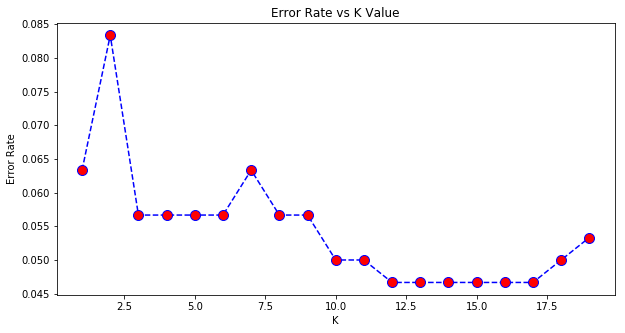

In [114]:
plt.figure(figsize=(10,5))
plt.plot(range(1,20),error_rate,color='blue',ls='--',marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

We will also investigate the model performance based on the k-values after evaluating the model for the default value of 1 to new k-value 11.

In [115]:
knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=11, p=2,
           weights='uniform')

In [116]:
y_pred = knn.predict(X_test)

In [117]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       142
           1       0.96      0.95      0.95       158

   micro avg       0.95      0.95      0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300

[[135   7]
 [  8 150]]


**95% accuracy** with 
class 0 : for all column excluded 'TARGET CLASS'(feature)
 class 1 : only ' TARGET CLASS'  (target var)   
    confusion matrix says: class 0 have 135 value & class 1 has 150 value,only 15 value are not fix.